# Modelos Lineares: De Regressão a Classificação

### Conteúdo Abordado

1.  **Regressão Linear**
    * Intuição e Formulação Matemática
    * Geração de Dados Sintéticos
    * Função de Custo: Erro Quadrático Médio (MSE)
    * Solução Analítica: A Equação Normal
    * Solução Iterativa: Gradiente Descendente Estocástico (SGD)
    * Implementação e Treinamento com PyTorch
    * Visualização da Curva de Aprendizado
    * Inferência com o Modelo Treinado
2.  **Regressão Logística**
    * Da Regressão à Classificação
    * Função de Ativação Sigmoid
    * Geração de Dados Sintéticos para Classificação
    * Função de Custo: Entropia Cruzada Binária (Log-Loss)
    * Implementação e Treinamento com PyTorch
    * Visualização das Curvas de Aprendizado (Custo e Acurácia)
    * Inferência e Fronteira de Decisão

## 1. Introdução aos Modelos Lineares

Modelos lineares são a base de muitos algoritmos de machine learning e formam o pilar fundamental para a compreensão de redes neurais mais complexas. A ideia central é que podemos modelar a relação entre um conjunto de variáveis de entrada (features) e uma variável de saída (alvo) através de uma combinação linear dessas entradas.

A simplicidade desses modelos os torna altamente interpretáveis e computacionalmente eficientes. Eles servem como um excelente ponto de partida para problemas de regressão (prever um valor contínuo) e classificação (prever uma categoria discreta).

Neste notebook, exploraremos dois dos modelos lineares mais importantes: a **Regressão Linear** e a **Regressão Logística**.

## 2. Regressão Linear

A Regressão Linear é utilizada para prever um valor de saída contínuo, $y$, a partir de um conjunto de variáveis de entrada, $x$. O modelo assume que a relação entre a entrada e a saída é linear.

### Intuição e Formulação Matemática

Para um único atributo (feature) $x$, a hipótese de um modelo de regressão linear é representada pela equação de uma reta:

$$ \hat{y} = w x + b $$

Onde:
- $\hat{y}$ é o valor previsto.
- $x$ é a variável de entrada.
- $w$ é o **peso** (weight), que corresponde ao coeficiente angular da reta (inclinação).
- $b$ é o **bias** (ou intercepto), que corresponde ao ponto onde a reta cruza o eixo y.

O objetivo do aprendizado é encontrar os valores ótimos de $w$ e $b$ que melhor se ajustam aos dados de treinamento.

Quando temos múltiplos atributos, $x_1, x_2, \dots, x_n$, a equação se generaliza para:

$$ \hat{y} = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b $$

Em notação vetorial, podemos simplificar a escrita:

$$ \hat{y} = \mathbf{w}^T \mathbf{x} + b $$

Onde:
- $\mathbf{w}$ é o vetor de pesos.
- $\mathbf{x}$ é o vetor de atributos de entrada.
- $\mathbf{w}^T$ é a transposta do vetor de pesos.

In [ ]:
# Geração de Dados Sintéticos para Regressão
import torch
import numpy as np
import matplotlib.pyplot as plt

# Configurações para reprodutibilidade
torch.manual_seed(42)

# Definindo os parâmetros verdadeiros do nosso modelo (que tentaremos aprender)
true_weight = 2.5
true_bias = 0.8

num_points = 50
# Gerando os dados de entrada (features)
X = torch.randn(num_points, 1) * 10

# Gerando os dados de saída (alvos) com base nos parâmetros e adicionando ruído
# y = w*X + b + ruído
noise = torch.randn(num_points, 1) * 16
y = true_weight * X + true_bias + noise

# Visualizando os dados gerados
plt.figure(figsize=(10, 6))
plt.scatter(X.numpy(), y.numpy(), label="Dados Sintéticos")
plt.title("Dataset Sintético para Regressão Linear")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()

# Imprimindo as dimensões dos tensores
print(f"Dimensão de X: {X.shape}")
print(f"Dimensão de y: {y.shape}")

### Função de Custo: Erro Quadrático Médio (MSE)

Para encontrar os melhores valores de $w$ e $b$, precisamos de uma forma de medir o quão bem o nosso modelo está se saindo. A função de custo (ou função de perda) quantifica o erro entre os valores previstos ($\hat{y}$) e os valores reais ($y$).

Para a regressão linear, a função de custo mais comum é o **Erro Quadrático Médio** (Mean Squared Error - MSE). Ela calcula a média dos quadrados das diferenças entre as previsões e os valores reais.

A fórmula para o MSE, para um conjunto de $m$ exemplos de treinamento, é:

$$ J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 $$

Onde:
- $\hat{y}^{(i)} = w x^{(i)} + b$ é a previsão para o $i$-ésimo exemplo.
- $y^{(i)}$ é o valor real para o $i$-ésimo exemplo.

Nosso objetivo é minimizar essa função de custo $J(w, b)$. Um valor menor para o MSE indica um melhor ajuste do modelo aos dados.

### Solução Analítica: A Equação Normal

Para a regressão linear, existe uma solução de forma fechada, ou analítica, que nos permite encontrar os valores ótimos dos parâmetros ($w$ e $b$) de uma só vez, sem a necessidade de um processo iterativo. Esta solução é conhecida como **Equação Normal**.

Para usá-la, primeiro representamos nossos dados de entrada $X$ como uma matriz onde cada linha é um exemplo de treinamento e adicionamos uma coluna de 1s para representar o termo de bias ($b$). Se $X$ tem $m$ exemplos e $n$ features, a nova matriz, que chamaremos de $X_b$, terá dimensões $(m, n+1)$. O vetor de parâmetros $\theta$ incluirá tanto os pesos $w$ quanto o bias $b$.

A solução que minimiza a função de custo MSE é dada por:

$$ \hat{\theta} = (X_b^T X_b)^{-1} X_b^T y $$

Onde:
- $\hat{\theta}$ é o vetor de parâmetros ótimos.
- $X_b$ é a matriz de features com a coluna de bias adicionada.
- $y$ é o vetor de valores alvo.
- $(X_b^T X_b)^{-1}$ é a inversa da matriz $X_b^T X_b$.

Embora seja uma solução direta, o cálculo da inversa da matriz $(X_b^T X_b)$ pode ser computacionalmente muito caro, especialmente quando o número de features ($n$) é grande. Por essa razão, métodos iterativos como o Gradiente Descendente são mais comuns na prática, especialmente em deep learning.

In [ ]:
# Solução com a Equação Normal

# Preparando a matriz X_b adicionando uma coluna de 1s
X_b = torch.cat([torch.ones(X.shape[0], 1), X], dim=1)

# Calculando os parâmetros ótimos usando a Equação Normal
# theta = (X_b.T @ X_b)^-1 @ X_b.T @ y
try:
    theta_best = torch.inverse(X_b.T @ X_b) @ X_b.T @ y
    b_analytical = theta_best[0].item()
    w_analytical = theta_best[1].item()

    print(f"Parâmetros encontrados pela Equação Normal:")
    print(f"Peso (w): {w_analytical:.4f}")
    print(f"Bias (b): {b_analytical:.4f}")

    # Plotando o resultado
    plt.figure(figsize=(10, 6))
    plt.scatter(X.numpy(), y.numpy(), label="Dados Sintéticos")
    plt.plot(X.numpy(), (w_analytical * X + b_analytical).numpy(), color='r', label="Regressão Analítica")
    plt.title("Solução Analítica da Regressão Linear")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.legend()
    plt.grid(True)
    plt.show()

except torch.linalg.LinAlgError:
    print("A matriz X_b.T @ X_b é singular e não pode ser invertida.")

print("--- Parâmetros verdadeiros (para comparação) ---")
print(f"Peso real: {true_weight}")
print(f"Bias real: {true_bias}")

### Solução Iterativa: Gradiente Descendente Estocástico (SGD)

Diferente da solução analítica, o Gradiente Descendente é um algoritmo de otimização iterativo que busca minimizar a função de custo ajustando gradualmente os parâmetros do modelo. A ideia é "descer a colina" da função de custo, dando passos na direção do gradiente negativo.

O **gradiente** é um vetor que aponta na direção de maior crescimento da função. Portanto, para minimizar a função, ajustamos os parâmetros na direção oposta ao gradiente.

A regra de atualização para cada parâmetro (seja $w$ ou $b$) é:

$$ \theta_{novo} = \theta_{antigo} - \eta \nabla J(\theta) $$

Onde:
- $\theta$ representa um parâmetro do modelo ($w$ ou $b$).
- $\eta$ (eta) é a **taxa de aprendizado** (learning rate), um hiperparâmetro que controla o tamanho do passo que damos a cada iteração.
- $\nabla J(\theta)$ é o gradiente da função de custo em relação ao parâmetro $\theta$.

Existem diferentes variantes do Gradiente Descendente:
1.  **Batch Gradient Descent**: Calcula o gradiente usando todo o conjunto de dados de treinamento. É preciso, mas lento para datasets grandes.
2.  **Stochastic Gradient Descent (SGD)**: Calcula o gradiente usando apenas um exemplo de treinamento por vez. É muito mais rápido, mas as atualizações são ruidosas.
3.  **Mini-batch Gradient Descent**: Um meio-termo, calcula o gradiente usando um pequeno lote (mini-batch) de exemplos. É a abordagem mais comum na prática. No PyTorch, o otimizador `SGD` implementa esta variante.

In [ ]:
# Definição do Modelo de Regressão Linear em PyTorch
import torch.nn as nn

# Definindo a classe do nosso modelo
# Herda de nn.Module, a classe base para todos os modelos de redes neurais no PyTorch
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # Definimos uma camada linear.
        # in_features=1: nosso modelo espera 1 feature de entrada.
        # out_features=1: nosso modelo produz 1 valor de saída.
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        # A passagem para frente (forward pass) define como a entrada é processada.
        # Aqui, simplesmente passamos a entrada pela camada linear.
        return self.linear(x)

In [ ]:
# Instanciando o modelo
model = LinearRegressionModel()
print("Estrutura do modelo:")
print(model)

In [ ]:
# Os parâmetros (peso e bias) são inicializados aleatoriamente
# Podemos inspecioná-los
print("Parâmetros iniciais (aleatórios):")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data.numpy()}")

In [ ]:
# Hiperparâmetros
learning_rate = 0.001
epochs = 200

# Função de custo (Loss Function)
# Usamos o MSELoss já implementado no PyTorch
loss_function = nn.MSELoss()

# Otimizador (Optimizer)
# Usamos o SGD, passando os parâmetros do modelo e a taxa de aprendizado
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Loop de Treinamento com SGD
from tqdm import tqdm

# Armazenar o histórico de perdas para visualização
losses = []

# Loop de treinamento
for epoch in tqdm(range(epochs), desc="Treinando o modelo"):
    # 1. Forward pass: fazer uma previsão
    y_pred = model(X)

    # 2. Calcular a perda (loss)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())

    # 3. Zerar os gradientes da iteração anterior
    optimizer.zero_grad()

    # 4. Backward pass: calcular os gradientes da perda em relação aos parâmetros
    loss.backward()

    # 5. Atualizar os pesos usando o otimizador
    optimizer.step()

print("\nTreinamento concluído!")
print(f"Perda final: {losses[-1]:.4f}")

# Imprimindo os parâmetros aprendidos
print("\nParâmetros aprendidos pelo modelo:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data.numpy()}")

In [ ]:
# Plot da Curva de Perda

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses)
plt.title("Curva de Aprendizado (Perda vs. Épocas)")
plt.xlabel("Época")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.grid(True)
plt.show()

In [ ]:
# Inferência e Visualização do Modelo Treinado

# Colocando o modelo em modo de avaliação
model.eval()

# Fazendo previsões com o modelo treinado
with torch.no_grad(): # Desabilita o cálculo de gradientes para inferência
    predicted = model(X).detach().numpy()

# Visualizando o resultado final
plt.figure(figsize=(10, 6))
plt.scatter(X.numpy(), y.numpy(), label="Dados Originais")
plt.plot(X.numpy(), predicted, color='r', label="Regressão com SGD")
plt.title("Resultado Final da Regressão Linear")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()

# Exemplo de inferência para um novo ponto
new_x = torch.tensor([[20.0]]) # Um novo valor de X
with torch.no_grad():
    new_y = model(new_x)
print(f"Previsão para X = {new_x.item():.1f} -> y = {new_y.item():.4f}")

### Exercícios: Regressão Linear

#### Exercício 1: Regressão Linear Múltipla com Dados Sintéticos

Até agora, nosso modelo usou apenas uma variável de entrada ($x$) para prever a saída ($y$). Na prática, a maioria dos problemas envolve múltiplas variáveis de entrada (features). Sua tarefa é adaptar o código para treinar um modelo de **Regressão Linear Múltipla**.

A equação do modelo se expande para:

$$\hat{y} = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b = \mathbf{w}^T \mathbf{x} + b$$

**Passos:**

1.  **Gere um novo dataset sintético**: Crie uma matriz de features $X$ com, por exemplo, 200 amostras e 3 features (ou seja, um tensor de dimensão `(200, 3)`).
2.  **Defina os Parâmetros Verdadeiros**: Crie os "pesos verdadeiros" que seu modelo tentará aprender. Por exemplo, um tensor `true_weights` de dimensão `(3, 1)` como `torch.tensor([[2.5], [-1.8], [0.5]])` e um `true_bias` escalar.
3.  **Calcule o Alvo `y`**: Gere a variável alvo `y` usando a multiplicação de matrizes e adicionando ruído. A equação em PyTorch será: `y = X @ true_weights + true_bias + noise`.
4.  **Ajuste a Classe do Modelo**: Modifique a classe `LinearRegressionModel`. O argumento `in_features` da camada `nn.Linear` deve ser alterado para corresponder ao número de features do seu novo dataset $X$.
5.  **Treine e Verifique**: Treine o modelo como antes. Ao final, compare os pesos aprendidos (acessíveis via `model.parameters()`) com os `true_weights` que você definiu no passo 2. Os valores devem ser muito próximos, validando a correção da sua implementação.

#### Exercício 2: O Impacto da Taxa de Aprendizado ($\eta$)

A taxa de aprendizado ($\eta$) é um dos hiperparâmetros mais importantes no treinamento de redes neurais. Ela controla o tamanho dos passos dados durante a otimização para minimizar a função de custo, conforme a regra de atualização:

$$ \theta_{novo} = \theta_{antigo} - \eta \nabla J(\theta) $$

**Sua tarefa é investigar o efeito de diferentes taxas de aprendizado:**
1.  **Treine o modelo original** (de uma feature, com dados sintéticos) usando três valores diferentes para `learning_rate`:
    * Um valor muito pequeno (ex: `1e-6`).
    * O valor que usamos (ex: `0.001`).
    * Um valor muito grande (ex: `0.1`).
2.  **Plote a curva de perda (MSE vs. Épocas)** para cada um dos três experimentos no mesmo gráfico.
3.  **Analise e descreva** o que você observa em cada caso:
    * O que acontece quando $\eta$ é muito pequeno? A convergência é rápida ou lenta?
    * O que acontece quando $\eta$ é muito grande? O modelo consegue convergir? O que o comportamento da curva de perda sugere?

## 3. Regressão Logística

Enquanto a regressão linear é usada para prever valores contínuos, a **Regressão Logística** é usada para problemas de **classificação**, onde o objetivo é prever uma categoria discreta (por exemplo, 0 ou 1, "sim" ou "não", "gato" ou "cachorro").

Apesar do nome "regressão", é um modelo de classificação. Ele adapta o modelo linear para produzir uma probabilidade, que pode ser então usada para determinar a classe.

### Função de Ativação Sigmoid

Para transformar a saída de um modelo linear (que pode ser qualquer valor real) em uma probabilidade (um valor entre 0 e 1), usamos uma **função de ativação**. Para a Regressão Logística, a função utilizada é a **Sigmoid** (ou função logística).

A função Sigmoid é definida como:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Onde $z$ é a saída do modelo linear ($z = \mathbf{w}^T \mathbf{x} + b$).

- Se $z$ for muito grande e positivo, $e^{-z}$ se aproxima de 0, e $\sigma(z)$ se aproxima de 1.
- Se $z$ for muito grande e negativo, $e^{-z}$ se aproxima do infinito, e $\sigma(z)$ se aproxima de 0.
- Se $z = 0$, $\sigma(z) = 0.5$.

A saída $\sigma(z)$ pode ser interpretada como a probabilidade de a amostra pertencer à classe positiva (classe 1).
$$ \hat{p} = P(y=1 | \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b) $$

In [ ]:
# Visualização da Função Sigmoid

# Gerando valores para z
z = np.linspace(-10, 10, 100)

# Calculando a sigmoid
sigmoid = 1 / (1 + np.exp(-z))

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid)
plt.title("Função de Ativação Sigmoid")
plt.xlabel("z (saída linear)")
plt.ylabel("σ(z) (probabilidade)")
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--', label="Limite de 0.5")
plt.axvline(x=0.0, color='k', linestyle='-')
plt.legend()
plt.show()

In [ ]:
# Geração de Dados Sintéticos para Classificação
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Gerando um dataset linearmente separável
X_clf, y_clf = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Convertendo para tensores do PyTorch
X_clf = torch.from_numpy(X_clf).float()
y_clf = torch.from_numpy(y_clf).float().view(-1, 1) # Redimensiona para (200, 1)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

# Visualizando os dados
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train.squeeze() == 0][:, 0], X_train[y_train.squeeze() == 0][:, 1], label="Classe 0 (Treino)")
plt.scatter(X_train[y_train.squeeze() == 1][:, 0], X_train[y_train.squeeze() == 1][:, 1], label="Classe 1 (Treino)")
plt.title("Dataset Sintético para Classificação")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

### Função de Custo: Entropia Cruzada Binária (Log-Loss)

Para problemas de classificação, o MSE não é uma boa escolha, pois a função de custo pode se tornar não-convexa, dificultando a otimização. Em vez disso, usamos a **Entropia Cruzada Binária** (Binary Cross-Entropy), também conhecida como **Log-Loss**.

Essa função penaliza fortemente as previsões que estão confiantes e erradas. A fórmula para um único exemplo é:

$$ J(\theta) = -[y \log(\hat{p}) + (1 - y) \log(1 - \hat{p})] $$

Onde:
- $y$ é o rótulo verdadeiro (0 ou 1).
- $\hat{p}$ é a probabilidade prevista para a classe 1 ($\sigma(z)$).

Analisando a fórmula:
- Se $y=1$, o custo é $-\log(\hat{p})$. O custo é baixo se $\hat{p}$ está próximo de 1, e muito alto se está próximo de 0.
- Se $y=0$, o custo é $-\log(1 - \hat{p})$. O custo é baixo se $\hat{p}$ está próximo de 0, e muito alto se está próximo de 1.

Para $m$ exemplos, a função de custo é a média das perdas individuais:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)})] $$

In [ ]:
# Modelo e Treinamento da Regressão Logística

# Definindo a classe do modelo
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        # 2 features de entrada, 1 saída (antes da sigmoid)
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        # Passa pela camada linear e depois pela sigmoid
        return torch.sigmoid(self.linear(x))

In [ ]:
# Instanciando o modelo
clf_model = LogisticRegressionModel()

In [ ]:
# Hiperparâmetros
learning_rate_clf = 0.1
epochs_clf = 300

# Função de custo e otimizador
# BCELoss: Binary Cross Entropy Loss
loss_function_clf = nn.BCELoss()
optimizer_clf = torch.optim.SGD(clf_model.parameters(), lr=learning_rate_clf)

In [ ]:
# Listas para armazenar métricas
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Loop de treinamento
for epoch in tqdm(range(epochs_clf), desc="Treinando o classificador"):
    clf_model.train() # Modo de treinamento

    # Treino
    y_pred_train = clf_model(X_train)
    loss_train = loss_function_clf(y_pred_train, y_train)
    train_losses.append(loss_train.item())

    optimizer_clf.zero_grad()
    loss_train.backward()
    optimizer_clf.step()

    # Cálculo da acurácia de treino
    predicted_labels_train = (y_pred_train >= 0.5).float()
    acc_train = (predicted_labels_train == y_train).float().mean()
    train_accuracies.append(acc_train.item())

    # Validação (teste)
    clf_model.eval() # Modo de avaliação
    with torch.no_grad():
        y_pred_test = clf_model(X_test)
        loss_test = loss_function_clf(y_pred_test, y_test)
        test_losses.append(loss_test.item())

        # Cálculo da acurácia de teste
        predicted_labels_test = (y_pred_test >= 0.5).float()
        acc_test = (predicted_labels_test == y_test).float().mean()
        test_accuracies.append(acc_test.item())

print("\nTreinamento concluído!")
print(f"Acurácia final de teste: {test_accuracies[-1]:.4f}")

In [ ]:
# Plot das Curvas de Custo e Acurácia

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot da Perda (Loss)
ax1.plot(train_losses, label="Perda de Treino")
ax1.plot(test_losses, label="Perda de Teste")
ax1.set_title("Curvas de Perda (Loss)")
ax1.set_xlabel("Época")
ax1.set_ylabel("Entropia Cruzada Binária")
ax1.grid(True)
ax1.legend()

# Plot da Acurácia
ax2.plot(train_accuracies, label="Acurácia de Treino")
ax2.plot(test_accuracies, label="Acurácia de Teste")
ax2.set_title("Curvas de Acurácia")
ax2.set_xlabel("Época")
ax2.set_ylabel("Acurácia")
ax2.grid(True)
ax2.legend()

plt.show()

### Fronteira de Decisão

A fronteira de decisão é a linha (ou superfície, em dimensões maiores) que separa as áreas onde o modelo prevê uma classe daquelas onde prevê a outra. Para a Regressão Logística, a previsão é 1 se $\sigma(z) \ge 0.5$ e 0 caso contrário. Isso acontece quando o argumento da sigmoid, $z$, é igual a 0.

Portanto, a fronteira de decisão é a linha definida pela equação:

$$ \mathbf{w}^T \mathbf{x} + b = 0 $$

Visualizar essa fronteira nos ajuda a entender como o modelo está separando os dados.

In [ ]:
# Plot da Fronteira de Decisão

# Colocar o modelo em modo de avaliação
clf_model.eval()

# Criar um grid de pontos para plotar a fronteira
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf[:, 1].min() - 1, X_clf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Fazer previsões para cada ponto no grid
grid_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
with torch.no_grad():
    Z = clf_model(grid_tensor)
Z = Z.reshape(xx.shape)

# Plotar a fronteira e os dados de teste
plt.figure(figsize=(10, 6))
# A fronteira de decisão (contorno onde a probabilidade é 0.5)
plt.contourf(xx, yy, Z.detach().numpy() > 0.5, cmap=plt.cm.RdYlBu, alpha=0.5)

# Plotar os dados de teste
plt.scatter(X_test[y_test.squeeze() == 0][:, 0], X_test[y_test.squeeze() == 0][:, 1], label="Classe 0 (Teste)", c='blue', edgecolors='k')
plt.scatter(X_test[y_test.squeeze() == 1][:, 0], X_test[y_test.squeeze() == 1][:, 1], label="Classe 1 (Teste)", c='red', edgecolors='k')

# Exemplo de inferência em um novo ponto
new_point = torch.tensor([[-2.0, 1.0]])
with torch.no_grad():
    prediction_prob = clf_model(new_point)
    prediction_class = (prediction_prob >= 0.5).item()

# Plotar o novo ponto
plt.scatter(new_point[:, 0], new_point[:, 1], c='lime', marker='*', s=200, edgecolors='k', label=f'Novo Ponto (Previsto: Classe {int(prediction_class)})')
print(f"Probabilidade para o novo ponto: {prediction_prob.item():.4f}")
print(f"Classe prevista para o novo ponto: {int(prediction_class)}")


plt.title("Fronteira de Decisão da Regressão Logística")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### Exercícios: Regressão Logística

#### Exercício 1: Portas Lógicas AND e OR

As portas lógicas são os blocos de construção fundamentais da computação digital. Sua tarefa é usar a Regressão Logística para modelar as portas **AND** e **OR**.

**Tabelas Verdade:**

| $x_1$ | $x_2$ | AND | OR |
|:---:|:---:|:---:|:--:|
| 0   | 0   | 0   | 0  |
| 0   | 1   | 0   | 1  |
| 1   | 0   | 0   | 1  |
| 1   | 1   | 1   | 1  |

**Passos:**
1.  **Crie dois datasets**: um para a porta AND e outro para a porta OR. Cada dataset deve conter múltiplos exemplos para cada uma das quatro combinações de entrada (ex: 20 pontos para `(0,0)`, 20 para `(0,1)`, etc.).
2.  **Adicione um pouco de ruído gaussiano** aos dados de entrada $X$ para que os pontos não sejam exatamente 0 ou 1. Isso torna o problema de classificação mais realista.
3.  **Treine um modelo de Regressão Logística** para cada porta lógica.
4.  **Plote a fronteira de decisão** para cada modelo treinado. Você deve observar que o modelo consegue encontrar uma linha reta que separa perfeitamente as classes 0 e 1 para ambas as portas, pois elas são problemas **linearmente separáveis**.

--- Treinando modelo para a porta: AND ---
Acurácia final do treinamento: 1.0000


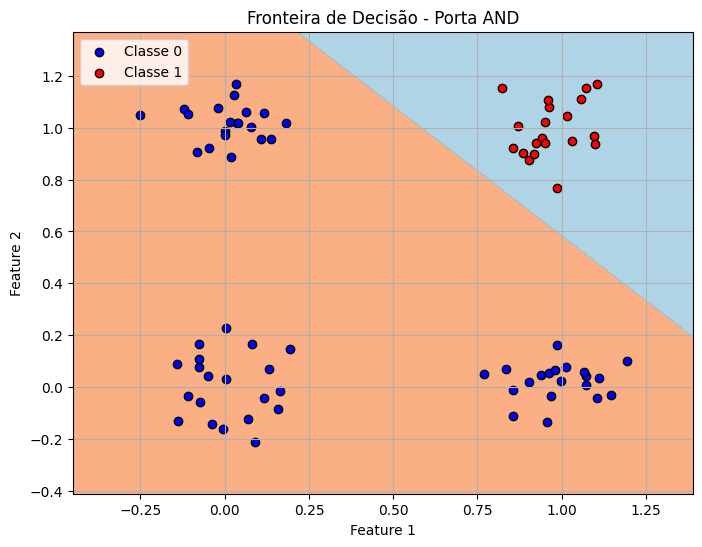

--- Treinando modelo para a porta: OR ---
Acurácia final do treinamento: 1.0000


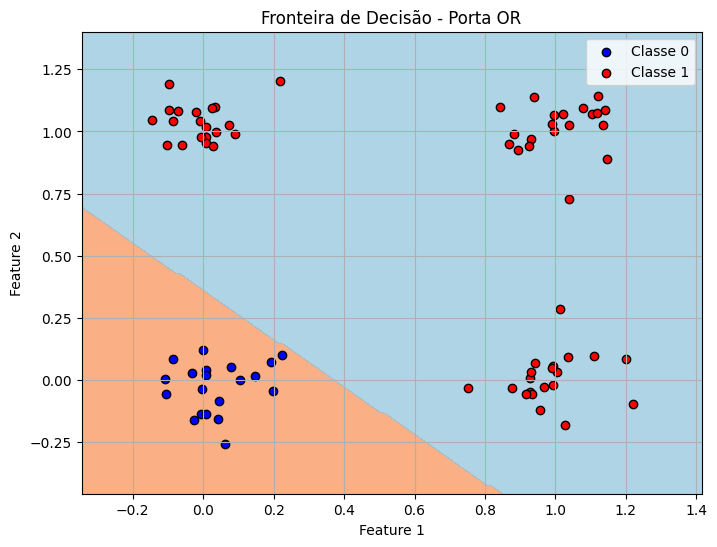

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Para reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


def create_logic_gate_dataset(gate_type='AND', samples_per_point=20, noise=0.1):
    """Cria um dataset com ruído para uma porta lógica específica."""
    points_base = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])

    if gate_type.upper() == 'AND':
        labels_base = torch.tensor([[0.], [0.], [0.], [1.]])
    elif gate_type.upper() == 'OR':
        labels_base = torch.tensor([[0.], [1.], [1.], [1.]])
    else:
        raise ValueError("A porta lógica deve ser 'AND' ou 'OR'")

    X = torch.cat([p + torch.randn(samples_per_point, 2) * noise for p in points_base])

    y = torch.cat([torch.full((samples_per_point, 1), l.item()) for l in labels_base])

    return X, y

def plot_decision_boundary(model, X, y, title):
    """Plota os dados e a fronteira de decisão aprendida pelo modelo."""
    model.eval()

    # Converte para numpy para plotagem
    X_np = X.numpy()
    y_np = y.numpy()

    # Cria um grid de pontos
    x_min, x_max = X_np[:, 0].min() - 0.2, X_np[:, 0].max() + 0.2
    y_min, y_max = X_np[:, 1].min() - 0.2, X_np[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Faz previsões para cada ponto no grid
    grid_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    with torch.no_grad():
        Z = model(grid_tensor).reshape(xx.shape)

    # Plota a fronteira e os dados
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z.numpy() > 0.5, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X_np[y_np.squeeze() == 0][:, 0], X_np[y_np.squeeze() == 0][:, 1], label="Classe 0", c='blue', edgecolors='k')
    plt.scatter(X_np[y_np.squeeze() == 1][:, 0], X_np[y_np.squeeze() == 1][:, 1], label="Classe 1", c='red', edgecolors='k')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

#Treinamento e Visualização

def train_and_evaluate(gate_type):
    """Função principal para treinar e avaliar um modelo para uma porta lógica."""
    print(f"--- Treinando modelo para a porta: {gate_type.upper()} ---")

    X_train, y_train = create_logic_gate_dataset(gate_type)

    model = LogisticRegressionModel()
    loss_function = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

    # Loop de Treinamento
    epochs = 1000
    for epoch in range(epochs):
        model.train()

        y_pred = model(X_train)
        loss = loss_function(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Cálculo da acurácia final
    with torch.no_grad():
        predicted = (model(X_train) >= 0.5).float()
        accuracy = (predicted == y_train).float().mean()
        print(f"Acurácia final do treinamento: {accuracy.item():.4f}")

    # Plote a fronteira de decisão
    plot_decision_boundary(model, X_train, y_train, f"Fronteira de Decisão - Porta {gate_type.upper()}")


train_and_evaluate('AND')
train_and_evaluate('OR')

#### Exercício 2: O Desafio da Porta Lógica XOR

Agora, vamos tentar o mesmo com a porta **XOR** (OU exclusivo).

**Tabela Verdade XOR:**

| $x_1$ | $x_2$ | XOR |
|:---:|:---:|:---:|
| 0   | 0   | 0   |
| 0   | 1   | 1   |
| 1   | 0   | 1   |
| 1   | 1   | 0   |

**Passos:**
1.  **Crie um dataset para a porta XOR**, seguindo a mesma abordagem do exercício anterior (múltiplos pontos com ruído para cada combinação de entrada).
2.  **Treine um modelo de Regressão Logística** para classificar os dados XOR.
3.  **Plote a fronteira de decisão** e a curva de acurácia.
4.  **Analise e responda**:
    * O que você observa no gráfico da fronteira de decisão?
    * Qual a acurácia máxima que o seu modelo consegue atingir? Por que você acha que ela fica estagnada em torno desse valor?
    * É possível traçar uma **única linha reta** que separe as saídas da classe 0 (pontos `(0,0)` e `(1,1)`) das saídas da classe 1 (pontos `(0,1)` e `(1,0)`)?

--- Treinando modelo para a porta: XOR ---
Acurácia final do treinamento: 0.5100


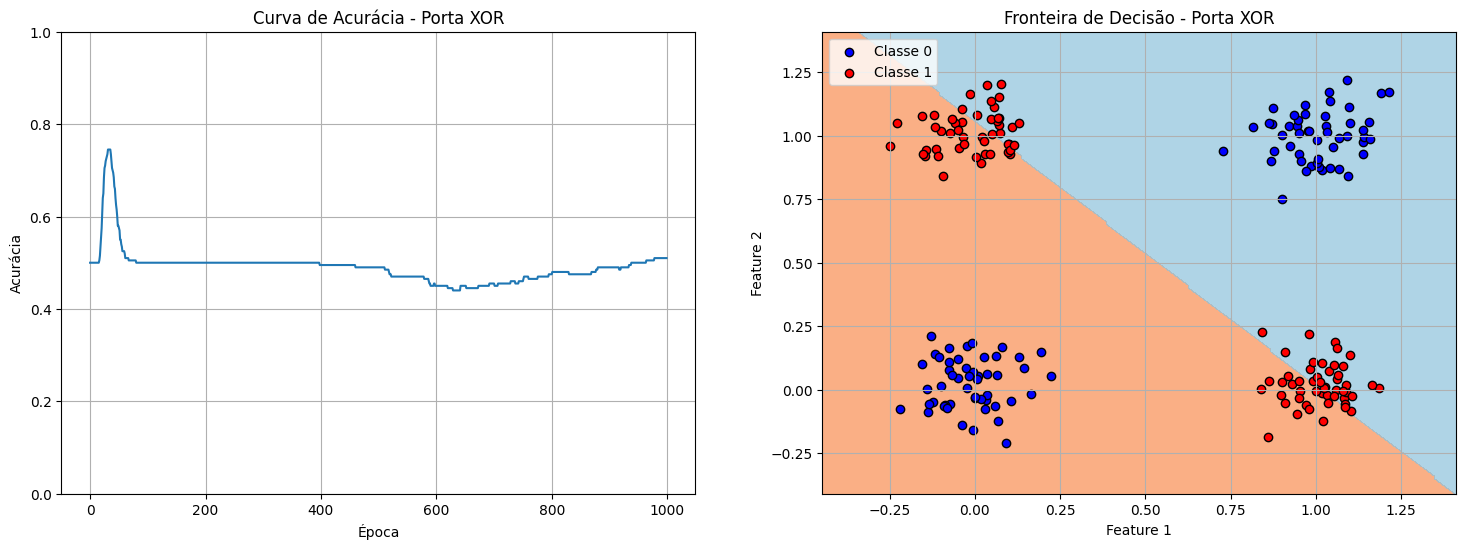

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

torch.manual_seed(42)
np.random.seed(42)

class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


def create_logic_gate_dataset(gate_type='XOR', samples_per_point=50, noise=0.1):
    """Cria um dataset com ruído para uma porta lógica específica."""
    points_base = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])

    if gate_type.upper() == 'XOR':
        # Tabela verdade do XOR
        labels_base = torch.tensor([[0.], [1.], [1.], [0.]])
    else:
        raise ValueError("Esta função está configurada para XOR.")

    X = torch.cat([p + torch.randn(samples_per_point, 2) * noise for p in points_base])
    y = torch.cat([torch.full((samples_per_point, 1), l.item()) for l in labels_base])

    return X, y

def plot_decision_boundary_and_accuracy(model, X, y, accuracies, title_prefix):
    """Plota a fronteira de decisão e a curva de acurácia."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    #Gráfico da Acurácia
    ax1.plot(accuracies)
    ax1.set_title(f"Curva de Acurácia - {title_prefix}")
    ax1.set_xlabel("Época")
    ax1.set_ylabel("Acurácia")
    ax1.grid(True)
    ax1.set_ylim(0, 1)

    # Gráfico da Fronteira de Decisão
    model.eval()
    X_np, y_np = X.numpy(), y.numpy()

    x_min, x_max = X_np[:, 0].min() - 0.2, X_np[:, 0].max() + 0.2
    y_min, y_max = X_np[:, 1].min() - 0.2, X_np[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    grid_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    with torch.no_grad():
        Z = model(grid_tensor).reshape(xx.shape)

    ax2.contourf(xx, yy, Z.numpy() > 0.5, cmap=plt.cm.RdYlBu, alpha=0.7)
    ax2.scatter(X_np[y_np.squeeze() == 0][:, 0], X_np[y_np.squeeze() == 0][:, 1], label="Classe 0", c='blue', edgecolors='k')
    ax2.scatter(X_np[y_np.squeeze() == 1][:, 0], X_np[y_np.squeeze() == 1][:, 1], label="Classe 1", c='red', edgecolors='k')

    ax2.set_title(f"Fronteira de Decisão - {title_prefix}")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")
    ax2.legend()
    ax2.grid(True)

    plt.show()

#Treinamento e Visualização

def train_and_evaluate_xor():
    """Função principal para treinar e avaliar o modelo para a porta XOR."""
    print("--- Treinando modelo para a porta: XOR ---")

    X_train, y_train = create_logic_gate_dataset('XOR')

    model = LogisticRegressionModel()
    loss_function = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

    epochs = 1000
    accuracies = []

    for epoch in range(epochs):
        model.train()

        y_pred = model(X_train)
        loss = loss_function(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calcula e armazena a acurácia a cada época
        with torch.no_grad():
            predicted = (model(X_train) >= 0.5).float()
            accuracy = (predicted == y_train).float().mean()
            accuracies.append(accuracy.item())

    print(f"Acurácia final do treinamento: {accuracies[-1]:.4f}")

    plot_decision_boundary_and_accuracy(model, X_train, y_train, accuracies, "Porta XOR")

# Executar para a porta XOR
train_and_evaluate_xor()


**1. O que você observa no gráfico da fronteira de decisão?**

No gráfico, é possível observar que o modelo de Regressão Logística traça uma única linha reta na tentativa de separar as quatro nuvens de pontos. Essa linha falha em sua tarefa, pois é impossível dividir os pontos com apenas um corte linear.

**2. Qual a acurácia máxima que o seu modelo consegue atingir? Por que você acha que ela fica estagnada em torno desse valor?**

A acurácia máxima que o modelo consegue atingir é de aproximadamente 50%, como pode ser visto no gráfico e no resultado impresso pelo código. Ela fica estagnada neste valor porque o problema XOR não é linearmente separável.


**3. É possível traçar uma única linha reta que separe as saídas da classe 0 (pontos (0,0) e (1,1)) das saídas da classe 1 (pontos (0,1) e (1,0))?**

Não, não é possível. Este é o ponto do exercício. Nenhuma linha reta pode ser traçada no plano de forma a deixar os pontos (0,0) e (1,1) de um lado e os pontos (0,1) e (1,0) do outro. Este desafio expõe a limitação fundamental dos modelos lineares.